In [4]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score,mean_absolute_error,mean_squared_error,r2_score
import numpy as np
import matplotlib.pyplot as plt
df=pd.read_csv('Tesla_Nasdaq_Prediction.csv')
os.environ['TF_ENABLE_ONEDNN_OPTS'] = '0'
import tensorflow as tf
print(tf.__version__)


feature_df = df.iloc[:, 2:]
print(feature_df)


target_df=df['Close/Last']
print(target_df)





2.15.0
        Volume     Open     High      Low
0     18337900  1043.21  1048.44  1022.44
1     26482350  1052.39  1076.59  1021.54
2     29782850  1073.47  1079.00  1027.70
3     26691670  1136.30  1152.87  1087.30
4     27392570  1089.38  1149.91  1072.53
...        ...      ...      ...      ...
2512   5574815     6.49     6.61     6.41
2513   5486020     6.68     6.74     6.42
2514   3247900     6.79     6.81     6.57
2515   5169020     6.75     6.90     6.58
2516   5526735     6.65     6.66     6.40

[2517 rows x 4 columns]
0       1025.49
1       1057.26
2       1045.76
3       1091.26
4       1145.45
         ...   
2512       6.45
2513       6.45
2514       6.72
2515       6.69
2516       6.62
Name: Close/Last, Length: 2517, dtype: float64


In [5]:
X_train, X_test, y_train, y_test = train_test_split(feature_df, target_df, test_size=0.2, random_state=42)

In [6]:
scalar = MinMaxScaler()
X_train_scalled = scalar.fit_transform(X_train)
X_test_scalled = scalar.transform(X_test)
Y_train_scalled = scalar.fit_transform(y_train.values.reshape(-1,1))
Y_test_scalled = scalar.transform(y_test.values.reshape(-1,1))
from keras.models import Sequential
from keras.layers import SimpleRNN, Dropout, Dense

In [7]:
X_train_reshaped = X_train_scalled.reshape(X_train_scalled.shape[0],1, X_train_scalled.shape[1])
X_test_reshaped = X_test_scalled.reshape(X_test_scalled.shape[0],1, X_test_scalled.shape[1])

In [8]:
from keras.models import Sequential
from keras.layers import SimpleRNN, Dropout, Dense

model = Sequential([
    SimpleRNN(256, input_shape=(X_test_reshaped.shape[1], X_test_reshaped.shape[2]), return_sequences=True),
    Dropout(0.25),
    SimpleRNN(128, return_sequences=True),
    Dropout(0.25),
    SimpleRNN(64),
    Dense(1)
])


In [9]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [10]:
history=model.fit(X_train_reshaped, Y_train_scalled, epochs=75,
                  batch_size=32, validation_split=0.1)

Epoch 1/75
57/57 [==============================] - 5s 18ms/step - loss: 0.0092 - val_loss: 2.8683e-04
Epoch 2/75
57/57 [==============================] - 0s 8ms/step - loss: 0.0013 - val_loss: 4.7475e-05
Epoch 3/75
57/57 [==============================] - 0s 7ms/step - loss: 9.8179e-04 - val_loss: 3.6361e-04
Epoch 4/75
57/57 [==============================] - 0s 8ms/step - loss: 6.9985e-04 - val_loss: 5.6954e-05
Epoch 5/75
57/57 [==============================] - 0s 7ms/step - loss: 6.0852e-04 - val_loss: 7.6952e-05
Epoch 6/75
57/57 [==============================] - 0s 8ms/step - loss: 8.4211e-04 - val_loss: 2.7353e-04
Epoch 7/75
57/57 [==============================] - 0s 8ms/step - loss: 7.5260e-04 - val_loss: 8.1001e-05
Epoch 8/75
57/57 [==============================] - 0s 8ms/step - loss: 7.1012e-04 - val_loss: 1.1416e-04
Epoch 9/75
57/57 [==============================] - 0s 8ms/step - loss: 5.6068e-04 - val_loss: 9.2717e-05
Epoch 10/75
57/57 [==============================] - 

In [11]:
PredefinedSplits=model.predict(X_test_reshaped)
preds=scalar.inverse_transform(PredefinedSplits)

16/16 [==============================] - 0s 2ms/step


<function matplotlib.pyplot.show(close=None, block=None)>

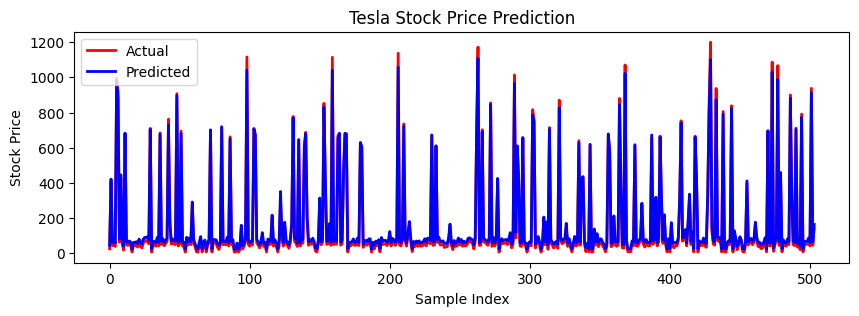

In [12]:
plt.figure(figsize=(10,3))
plt.plot(y_test.values, label='Actual',color='red',linewidth=2)
plt.plot(preds, label='Predicted',color='blue',linewidth=2)
plt.legend()
plt.xlabel('Sample Index')
plt.ylabel('Stock Price')
plt.title('Tesla Stock Price Prediction')
plt.show

In [13]:
mae = mean_absolute_error(y_test, preds)
mse = mean_squared_error(y_test, preds)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, preds)

In [14]:
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Absolute Error: 18.856666442931644
Mean Squared Error: 436.63360335203134
Root Mean Squared Error: 20.895779558370904
R-squared: 0.9933205735223432


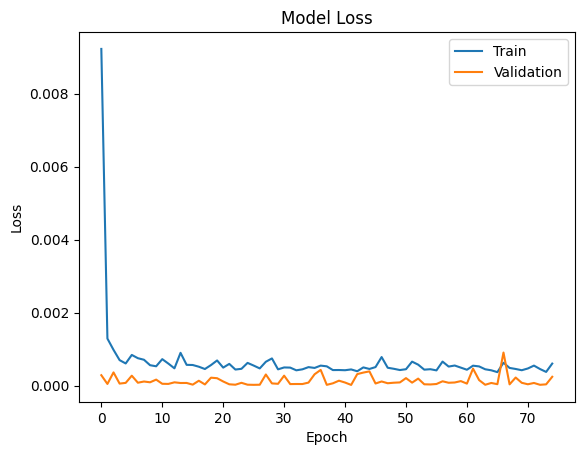

In [15]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [16]:
model.save('Tesla_Nasdaq_Prediction.h5')
print("Model Saved")

Model Saved


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
